In [ ]:
#1-Import the necessary libraries


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_absolute_error

In [6]:
#2-Load the we_fn_use_c_marketing_customer_value_analysis.csv 
#into the variable customer_df.

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

#3First look at its main features (head, shape, info).
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
column_names = customer_df.columns
column_names

In [ ]:
#4Rename the columns so they follow the PE8 (snake case).
#Standardize header names
customer_df= customer_df.rename(columns={'EmploymentStatus':'Employment_Status',
                            'Customer Lifetime Value':'Customer_Lifetime_Value', 
                            'Effective To Date':'Effective_To_Date'})
data.head()

In [ ]:
#5Change effective to date column to datetime format.
#customer_df1=customer_df.rename(columns={'Customer Lifetime Value', 'EmploymentStatus': 'Customer_Lifetime_Value','Employment_Status'}, inplace=True)
#customer_df1

customer_df['Effective_To_Date'] = pd.to_datetime(customer_df['Effective_To_Date'])

customer_df['Effective_To_Date']

In [17]:
#6-Check NaN values per column.
numericals.isnull().sum()/len(numericals)

Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Total Claim Amount               0.0
dtype: float64

In [ ]:
display(data.dtypes)

In [16]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [19]:
customer_df['Number of Policies'].value_counts(dropna=False)

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64

In [23]:
#numericals['Number of Policies'].fillna(customer_df['Number of Policies'].mean()).hist()

In [ ]:
#customer_df = customer_df.astype(object).replace(np.nan, 'No')
#display(customer_df.head())

In [25]:
display(customer_df.describe())

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [26]:
num_cols = customer_df._get_numeric_data().columns
num_cols

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [36]:
#numCols = customer_df.select_dtypes("number").columns
#catCols = customer_df.select_dtypes("object").columns
#numCols= list(set(numCols))
#catCols= list(set(catCols))

In [37]:
#customer_df['Vehicle Size'].hist(bins=20)

In [38]:
#customer_df['Number of Policies'].unique()[0:20]

In [39]:
#customer_df['Vehicle Size'].hist(bins=20)

In [11]:
#numCols1 = customer_df.select_dtypes(include=['category'])

#numCols2 = customer_df.select_dtypes(exclude=['int','float']).dtypes


In [31]:
#customer_df['Income'].hist(bins=20)

In [32]:
categoricals=customer_df.select_dtypes('object')
display(categoricals)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [33]:
numerical=customer_df._get_numeric_data()
display(numerical)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [68]:
#7-Define a function that differentiates between continuous and 
#discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable
#and do the same for discrete and categorical.
def con_dis(data):
    con = data.select_dtypes(float)
    dis = data.select_dtypes(exclude=['float','object','datetime'])
    cat = data.select_dtypes(object)
    return con, dis, cat

con, dis, cat= con_dis(customer_df)
cat.head(10)
    

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,CF85061,Arizona,No,Premium,Master,1/18/11,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,DY87989,Oregon,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,BQ94931,Oregon,No,Extended,College,2/17/11,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


In [ ]:
#8-For the categorical data, 
#check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, 
#decide what to do with the variables you get.

#It is already cleaned



In [66]:
#9-Get categorical features.
#get the distribution of the Numerical features
Numerical_features =customer_df.describe()

#get the disctibution of the categorical features
categorical_features= customer_df.describe(include=['O'])

#get the distribution for both categorical and numerical features
Both_features =customer_df.describe(include='all')

In [ ]:
#10-What should we do with the customer_id column?
customer_df2 = customer_df.drop(['Customer'],axis=1)

# Lab 2

In [84]:
corr_cons = con.corr()
display(corr_cons)

,Customer Lifetime Value,Total Claim Amount
Customer Lifetime Value,1.000000,0.226451
Total Claim Amount,0.226451,1.000000


In [82]:
corr_dis = dis.corr()
display(corr_dis)

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
Income,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
Monthly Premium Auto,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
Months Since Last Claim,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
Months Since Policy Inception,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
Number of Open Complaints,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
Number of Policies,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


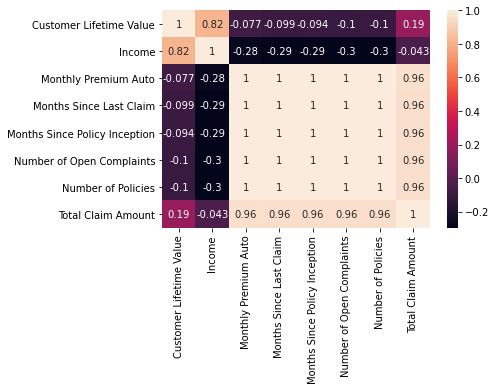

In [69]:
#1 and 2 already done above
#3Plot a correlation matrix, what can you see?

correlations_matrix = Numerical_features.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()



In [79]:
#4-Create a function to plot every discrete variables. 
#Do the same with continuous variables (be careful, you may change 
#the plot type to another one better suited for continuous data).
def dis_plot(df):
    for c in df:
        sns.displot(x=c, data=df)

    return None





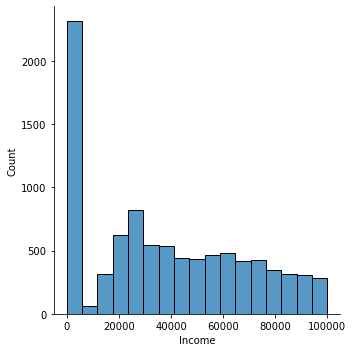

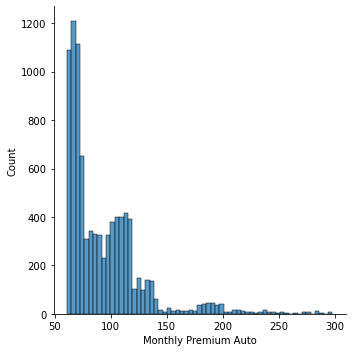

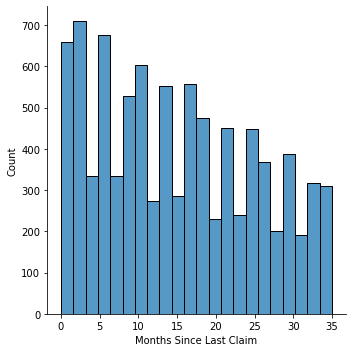

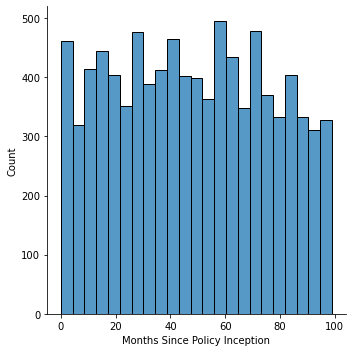

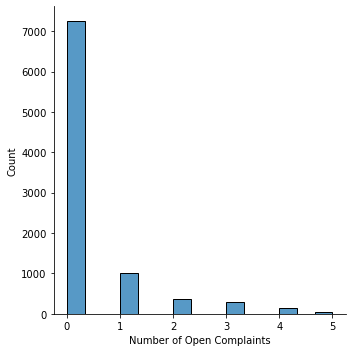

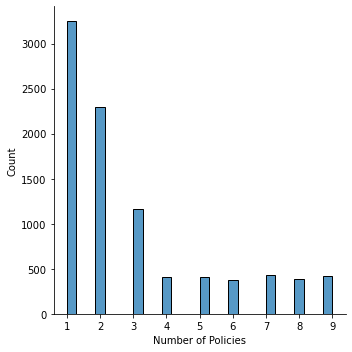

In [80]:
dis_plot(dis)

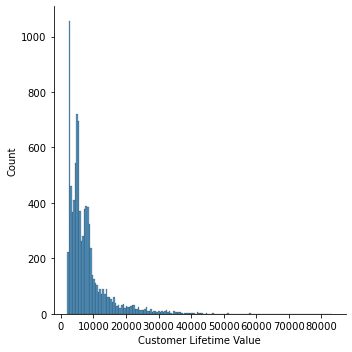

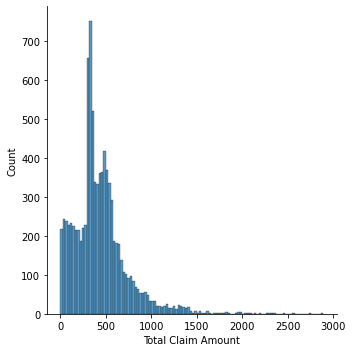

In [81]:
def con_plot(df):
    for c in df:
        sns.displot(x=c, data=df)

    return None
con_plot(con)

In [ ]:
#5-What can you see in the plots?

#Income has really large null values 

#6-Look for outliers in the continuous variables we have found. 
#Hint: There was a good plot to do that.

#We can use boxplot to see the outliers as we have done below and then we can do imputing or replace with 0.



<AxesSubplot:>

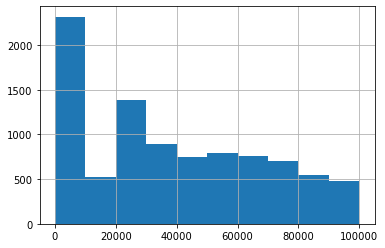

In [91]:
numericals['Income'].fillna(dis['Income'].mean()).hist()

<AxesSubplot:ylabel='Customer Lifetime Value'>

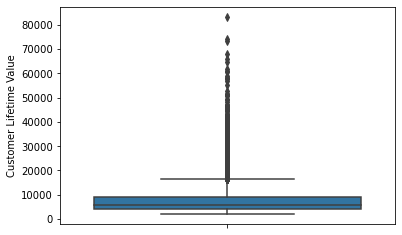

In [101]:
sns.boxplot(y=con['Customer Lifetime Value'])


<AxesSubplot:ylabel='Total Claim Amount'>

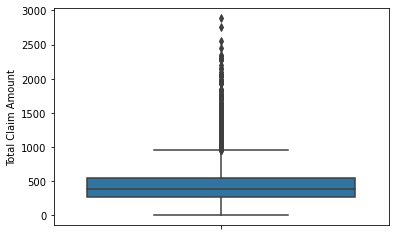

In [102]:
sns.boxplot(y=con['Total Claim Amount'])